# Assignment 2 - Logistic regression

In [20]:
# First, setup requires running the setup.sh file

In [21]:
# system tools
import os
import sys
sys.path.append("../../../../cds-lang-repo/cds-language")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

In [22]:
# load the data to a pandas csv
filename = os.path.join("..", "..", "..", "..", "cds-lang-repo", "cds-language", "data", "fake_or_real_news.csv")
data = pd.read_csv(filename, index_col=0)
data.sample(10)

,title,text,label
1433,"The Edge: Cruz, Trump get media attention post...",**Want FOX News First in your inbox every day?...,REAL
9927,GLOBAL WARMING ALARMISTS DISAPPOINTED THAT HUR...,Home › SCIENCE & TECHNOLOGY › GLOBAL WARMING A...,FAKE
623,Inside the swing-state playbooks,"The election in 232 photos, 43 numbers and 131...",REAL
6117,"Trump Haters Mow Down Signs, “Black Women for ...",A Twitter page known as Black Women for Trump ...,FAKE
10344,"Life: Touching: After Her Brother Passed Away,...",Email \nFor friends and family who loved him d...,FAKE
1783,The GOP’s nuclear option for Donald Trump: Why...,But before you really devote yourself to purgi...,REAL
8056,Hispanic Crowd Boos Marco Rubio off Stage,Hispanic Crowd Boos Marco Rubio off Stage Rafa...,FAKE
5548,Millennials ‘Search for Truth’ on Election but...,Millennials ‘Search for Truth’ on Election but...,FAKE
8440,BREAKING: Clinton’s intelligence briefings sus...,0 SHARE \nLaw enforcement and national intelli...,FAKE
5050,Clinton Goes After Republican Vote In Rare Fox...,Hillary Clinton made the case for her presiden...,REAL


In [23]:
# create data variables containing data and labels
X = data["text"]
y = data["label"]

In [24]:
# creating a 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # 80/20 split
                                                    random_state=42) # random state for reproducibility

In [25]:
# loading the saved vectorized data from the models folder
from joblib import dump, load
model_folder = os.path.join("..", "models")
vectorizer = load(model_folder + "/" + "tfidf_vectorizer.joblib")

In [26]:
# fit the vectorizer to the data

# fit to the training data
X_train_feats = vectorizer.fit_transform(X_train)

# fit for the test data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()

In [27]:
# fit the classifier to the data
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

In [28]:
# get predictions
y_pred = classifier.predict(X_test_feats)
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL'
 'REAL' 'REAL' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE']


In [29]:
# show 20 most informative features
clf.show_features(vectorizer, y_train, classifier, n=20)

FAKE				REAL

-4.9501	october        		4.5541	candidates     
-4.4089	hillary        		4.3354	but            
-4.0623	by             		3.2131	cruz           
-3.1702	november       		2.8834	conservative   
-2.6735	election       		2.8471	state          
-2.6301	email          		2.6564	gop            
-2.6085	us             		2.5974	tax            
-2.5315	com            		2.5788	that           
-2.4291	your           		2.4906	republicans    
-2.3087	however        		2.4730	sen            
-2.1925	you            		2.4414	fox            
-2.0541	voting         		2.3175	sanders        
-2.0321	russia         		2.2729	percent        
-1.9831	just           		2.2591	tuesday        
-1.8445	fbi            		2.2393	iran           
-1.8401	hillary clinton		2.2204	says           
-1.7993	this           		2.1515	debate         
-1.6674	of             		2.1276	republican     
-1.6213	see            		2.0681	attacks        


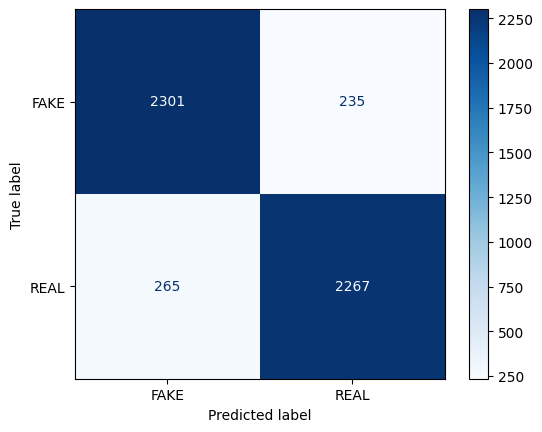

In [30]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in the data arranged alphabetically

In [31]:
# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.89      0.88      0.89       628
        REAL       0.88      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [32]:
# saving classification report as a .txt file
text_file = open(r'../output/LR_classification_report.txt', 'w')
text_file.write(classifier_metrics)
text_file.close()

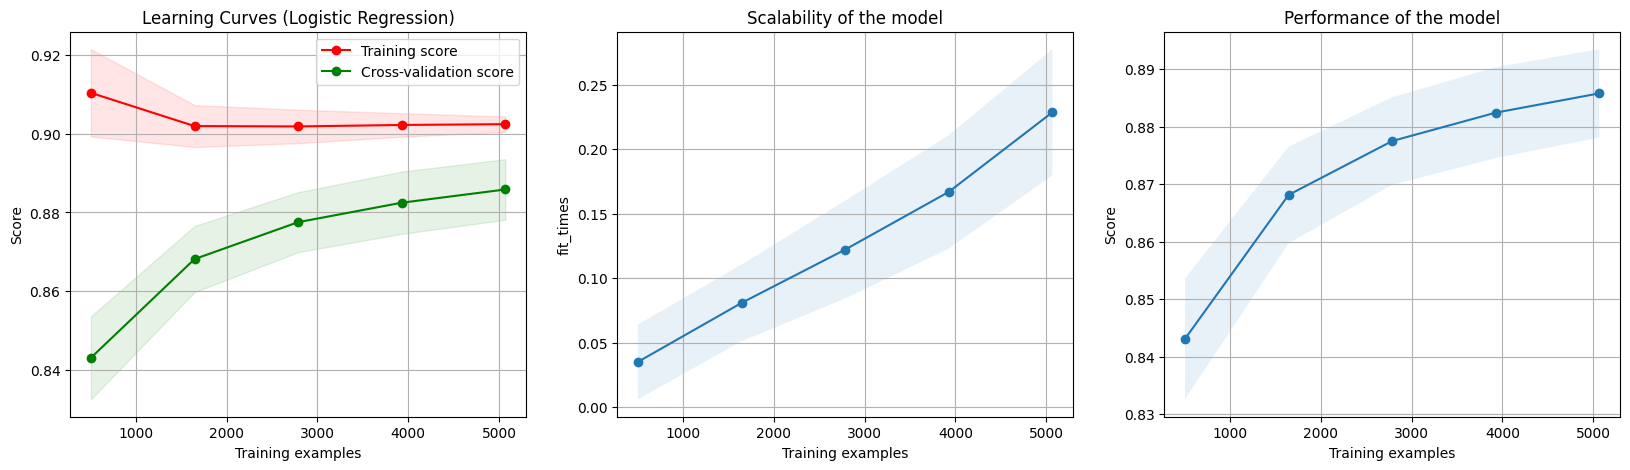

In [33]:
# cross validation
X_vect = vectorizer.fit_transform(X)


title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=4)

In [34]:
# saving the model for later use
from joblib import dump, load
model_folder = os.path.join("..", "models")
dump(classifier, model_folder + "/" + "LR_classifier.joblib")

['../models/LR_classifier.joblib']

In [35]:
# loading the saved model to the models folder
from joblib import dump, load
model_folder = os.path.join("..", "models")
loaded_clf = load(model_folder + "/" + "LR_classifier.joblib")

In [36]:
# test sentence
sentence = "Hillary Clinton is a crook who eats babies!"

In [37]:
# prediction for the test sentence
test_sentence = vectorizer.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype=object)